In [37]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # y = virginica 

svm_clf = Pipeline(steps=[
    ("poly_features", PolynomialFeatures(degree=30)),
    ('scaler', StandardScaler()),
    ('linear_SVC', LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=30)),
                ('scaler', StandardScaler()),
                ('linear_SVC', LinearSVC(C=1, loss='hinge'))])

Plot the all flowers in function of petal length and width emphasizing the Virginica.

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_dataset(X, y, axes):
    plt.figure(figsize=(10, 5))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.ylabel('Petal length')
    plt.xlabel('Petal width')
    plt.title('Petal length and width vs Virginica')
    
# plot_dataset(X, y)
# plt.show()

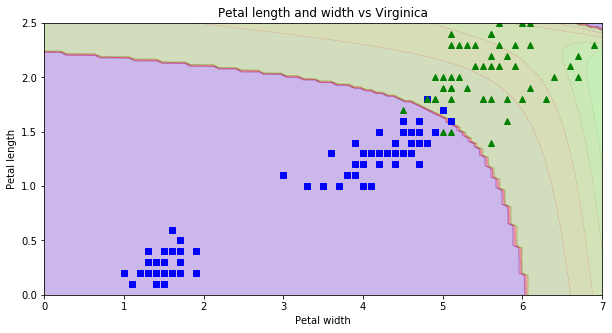

In [39]:
def plot_predictions(X, y, clf, axes):   
    plt.figure(figsize=(10, 5))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.ylabel('Petal length')
    plt.xlabel('Petal width')
    plt.title('Petal length and width vs Virginica')
    
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(X, y, svm_clf, [0, 7, 0, 2.5])
plt.show()

